<div style="background-color: #A2C579; padding: 30px; text-align: center; padding: 20px; text-align: center; border-radius: 100px; border-style: double;margin-right: 180px; margin-left: 100px;">
<h1>Unraveling Gender Gap in Access to Household Funds</h1></div>

<div style="background-color: powderblue; padding: 20px; text-align: center; border-radius: 20px;font-size: 14px; border-style: double; margin-right: 100px; margin-left: 10px;">
    <p><b>Problem Statement & Background</b><br>The underlying societal and cultural belief in gender equality varies  from one country to the next. The perception that men and women should not enjoy equal rights result in multi-sectional barriers that women face within their daily lives, preventing them from enjoying equal rights and opportunities. Such patriarchal values becomes a barrier that bars women from accessing resources that are available to their male counterpart, leading them to limited financial freedom and agency.  
   <br><b>Proposed Solution</b><br> Better understanding the consequences of gender inequality and presenting evidence on the detrimental impacts it can bring to not just individual woman but to societies and their economies as a whole can serve as the first step towards sustainable transformation. By analyzing the relationship between beliefs in gender equality and access to household funds, we can come to conclusions on some of the finacial hurdles women have the face as a result of inherent patriarchal values.

<div style="background-color: #29ADB2; padding: 10px; text-align: center; border-radius: 50px; border-style: dotted; margin-right: 180px; margin-left: 100px;">
<h2>About the Data Set<\h2> 

<div style="background-color: powderblue; padding: 20px; text-align: left; border-radius: 20px;font-size: 14px; border-style: double; margin-right: 100px; margin-left: 10px;">
In 2020, Meta carried out surveys throughout 200 countries and territories that generated a global snapshop of gender inequality. In partnership with the World Bank and CARE they designed questionnaires that filled important gender data gaps and invited Facebook users from around the world to fill in the surveys. The datasets combines available country-level aggregate data from the year 2020. The first half of data wrangling was done through Excel, in which the irrelevant columns and datas were removed. The filter tool and pivot tool was used during this process. There are two questions within this survey we will focus on for the analysis; one asking whether surveyors believe men and women deserve and should enjoy equal opportunities, and a second question asking for the percentage of access they have to their household funds. The below columns represent data obtained from the corresponding survey questions. 
    
<br><b>GE_Combined</b><br>
This column records the answers to the survey question, <i>"How much do you agree or disagree with the following statement? Men and women should have equal opportunities (e.g. in education, jobs, household decision-making)."</i> Of the 3 options provided-<i> Agree, Neutral</i> and <i>Disgaree</i>, the column records the percentage of respondents, both women and men, who chose <i>Agree</i>.
<br><b>AH_Female </b><br>
This column documents the answer from female respondents to the following question, <i>What level of access to household money do you personally have?</i> Among two options provided-<i>Full Access</i> or <i>Limited Access</i>- the column records the percentage of female respondents who selected <i>Full Access</i>. 
 </div>

<div style="background-color: #29ADB2; padding: 10px; text-align: center; border-radius: 50px; border-style: dotted; margin-right: 180px; margin-left: 100px;">
<h2>Importing Libraries</h2><\div>

In [1]:
import pandas as pd #importing panda
import seaborn as sns #importing data visualization tools 
import matplotlib.pyplot as plt #importing plotting library
import matplotlib.patches as mpatches 
import matplotlib.colors as mcolors #importing for color mapping
import numpy as np  #importing linear algebra
from scipy.stats import pearsonr #importing to calculate the pearson correlation coefficient

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/geandaccesstohouseholdfund/GEAH_CSV.csv


In [2]:
df= pd.read_csv('/kaggle/input/geandaccesstohouseholdfund/GEAH_CSV.csv')
df.head()

,COUNTRY,Unnamed: 1,GE_Female,GE_Male,GE_Combined,Unnamed: 5,AH_Female,AH_Male,AH_Combined,AH_%DIFF
0,Afghanistan,NaN,93.0,92.0,93.0,NaN,75,78,76,3
1,Albania,NaN,90.0,89.0,90.0,NaN,77,82,79,5
2,Algeria,NaN,92.0,90.0,91.0,NaN,78,72,75,-6
3,Angola,NaN,94.0,93.0,93.0,NaN,36,33,34,-3
4,Argentina,NaN,84.0,76.0,80.0,NaN,19,19,19,0


<div style="background-color: #29ADB2; padding: 10px; text-align: center; border-radius: 50px; border-style: dotted; margin-right: 180px; margin-left: 100px;">
<h2>Data Cleansing</h2></div>

In [3]:
#check for any existing null values. 
df.isnull().sum()

COUNTRY          0
Unnamed: 1     132
GE_Female        9
GE_Male          9
GE_Combined      9
Unnamed: 5     132
AH_Female        0
AH_Male          0
AH_Combined      0
AH_%DIFF         0
dtype: int64

In [4]:
#Remove empty columns with no data.
columns_to_drop = ['Unnamed: 1', 'Unnamed: 5']
df = df.drop(columns_to_drop, axis=1)

In [5]:
#Removing rows with null values.
df_cleaned = df.dropna(inplace=True)

In [6]:
#Checking if empty columns & null values were successfully removed
df.isnull().sum()

COUNTRY        0
GE_Female      0
GE_Male        0
GE_Combined    0
AH_Female      0
AH_Male        0
AH_Combined    0
AH_%DIFF       0
dtype: int64

In [7]:
#Checking to see if there are any outliers in GE_Combined
print(df['GE_Combined'].unique())

[93. 90. 91. 80. 82. 92. 84. 87. 89. 86. 96. 65. 78. 88. 79. 73. 83. 81.
 77. 94. 95. 74. 97. 71. 19. 70. 72.]


In [8]:
#Removing the outlier 19. 
df = df[df['GE_Combined']!=19] #Remove outlier

In [9]:
#Checking datatypes to ensure they are suitable for use.
df.dtypes

COUNTRY         object
GE_Female      float64
GE_Male        float64
GE_Combined    float64
AH_Female        int64
AH_Male          int64
AH_Combined      int64
AH_%DIFF         int64
dtype: object

<div style="background-color: #29ADB2; padding: 10px; text-align: center; border-radius: 50px; border-style: dotted; margin-right: 180px; margin-left: 100px;">
<h2>Data Analysis</h2></div>

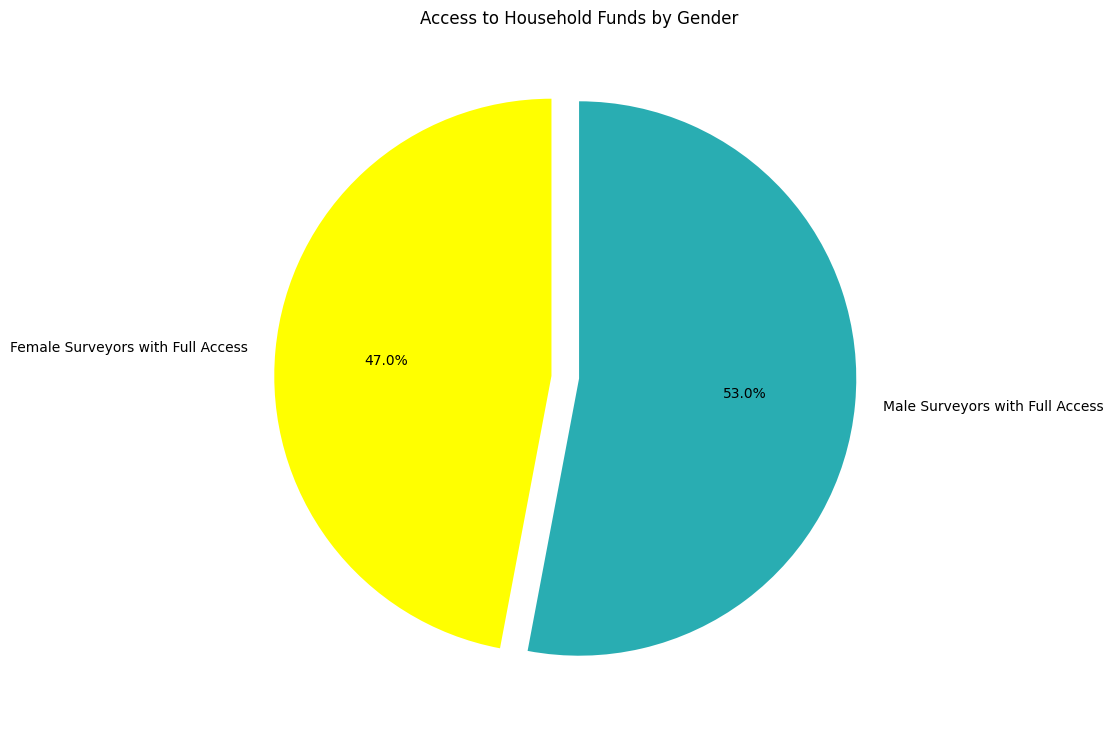

In [10]:
# Calcuating the total access to household fund by each gender 
total_female = df['AH_Female'].sum()
total_male = df['AH_Male'].sum()

# Plotting data for the pie chart
labels = ['Female Surveyors with Full Access', 'Male Surveyors with Full Access ']
sizes = [total_female, total_male]
colors = ['yellow', '#29ADB2']
explode = (0.1, 0)  # explode the 1st slice (Female)

# Making the piechart. Exploding the splice for emphasis. 
plt.figure(figsize=(9, 9))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Access to Household Funds by Gender')
plt.show()

<div style="background-color: powderblue; padding: 20px; text-align: center; border-radius: 20px;font-size: 14px; border-style: double; margin-right: 100px; margin-left: 10px;">
<div style="text-align: left">From this piechart, we can determine that amongst the population of facebook users around the world, men have 6% more access to household funds. We can come to the conclusion that gender norms influences economic opportunities and financial autonomy. 

In [11]:
df.head()

,COUNTRY,GE_Female,GE_Male,GE_Combined,AH_Female,AH_Male,AH_Combined,AH_%DIFF
0,Afghanistan,93.0,92.0,93.0,75,78,76,3
1,Albania,90.0,89.0,90.0,77,82,79,5
2,Algeria,92.0,90.0,91.0,78,72,75,-6
3,Angola,94.0,93.0,93.0,36,33,34,-3
4,Argentina,84.0,76.0,80.0,19,19,19,0


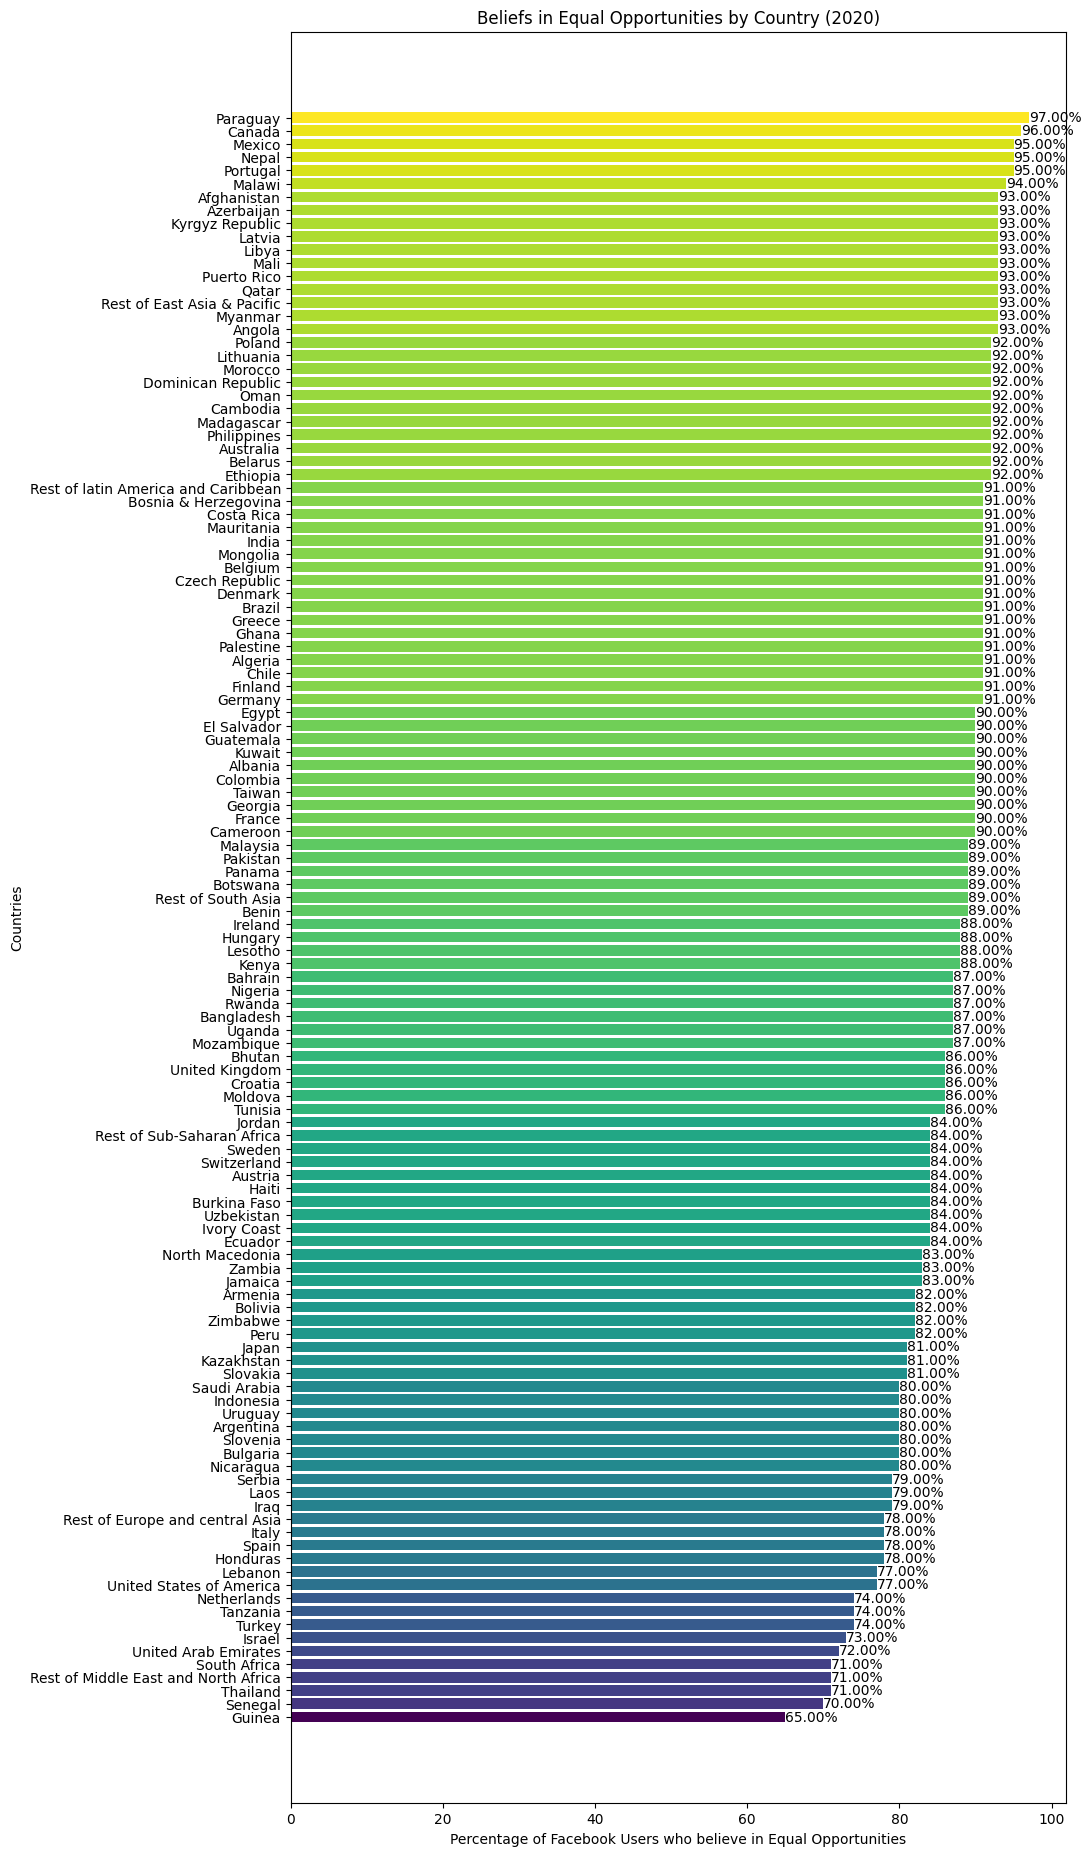

In [12]:
# Sorting countries by ascending order by the perception of equal opportunities and rights.
df_sorted = df.sort_values(by='GE_Combined', ascending=True)

# Setting up a viridis colormap
cmap = plt.get_cmap('viridis')

# Normalizing data for the color gradient
norm = mcolors.Normalize(vmin=df_sorted['GE_Combined'].min(), vmax=df_sorted['GE_Combined'].max())
colors = [cmap(norm(value)) for value in df_sorted['GE_Combined']]

# Creating the horizontal bar chart
plt.figure(figsize=(10, 23))
bars = plt.barh(df_sorted['COUNTRY'], df_sorted['GE_Combined'], color=colors)

# Adding labels and title
plt.xlabel('Percentage of Facebook Users who believe in Equal Opportunities')
plt.ylabel('Countries')
plt.title('Beliefs in Equal Opportunities by Country (2020)')

# Displaying 'GE_Combined' values next to the bars
for i, value in enumerate(df_sorted['GE_Combined']):
    plt.text(value, i, f'{value:.2f}%', ha='left', va='center', color='black', fontsize=10)

plt.show()

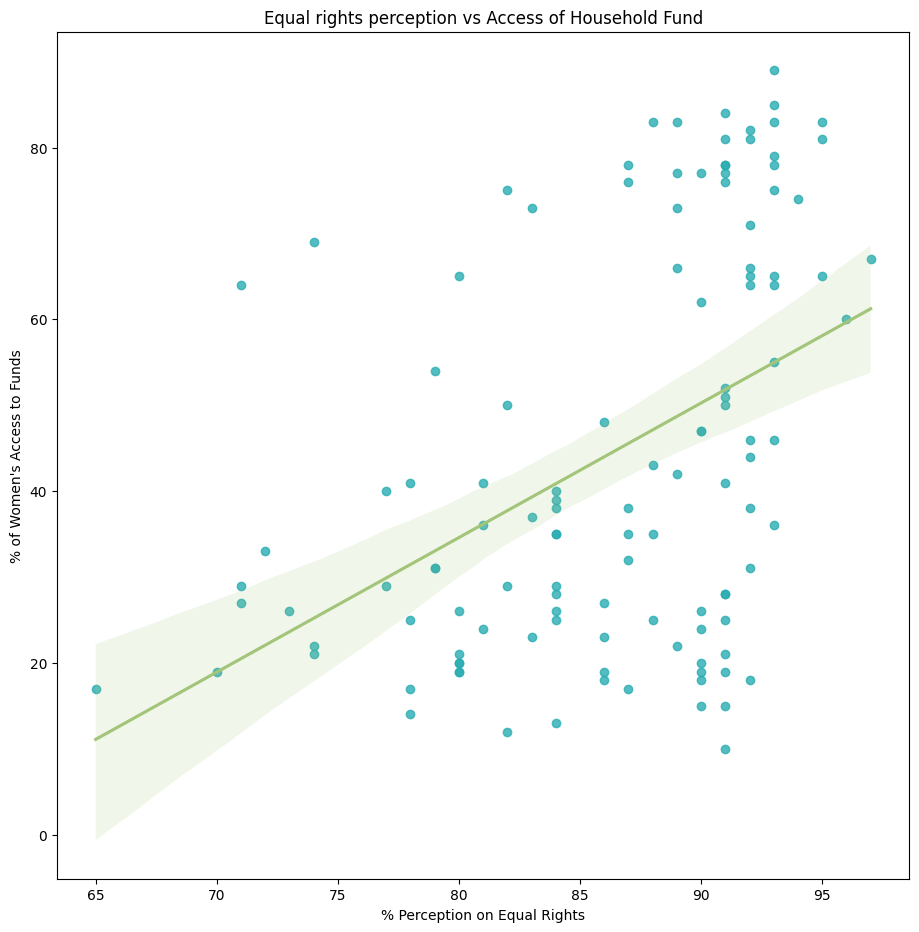

In [13]:
#plotting a regression plot to understand the relationship between the perception of Gender Equality and Women's Access to Household Funds.
figure, axes = plt.subplots(figsize=(11, 11))
sns.regplot(x=df['GE_Combined'],y=df['AH_Female'], scatter_kws={'color': '#29ADB2'}, line_kws={'color': '#A2C579'}).set(
    title='Equal rights perception vs Access of Household Fund',xlabel='% Perception on Equal Rights',ylabel="% of Women's Access to Funds")
plt.show()

In [14]:
# Select the relevant columns
data_subset = df[['GE_Combined', 'AH_Female']]

# Calculate the Pearson correlation coefficient between GE_Combined and AH_Female
correlation_coefficient_female, _ = pearsonr(data_subset['GE_Combined'], data_subset['AH_Female'])
print(f"Pearson Correlation Coefficient (GE_Combined vs AH_Female): {correlation_coefficient_female:.2f}")

Pearson Correlation Coefficient (GE_Combined vs AH_Female): 0.45


<div style="background-color: #29ADB2; padding: 10px; text-align: center; border-radius: 50px; border-style: dotted; margin-right: 180px; margin-left: 100px;">
<h2>Conclusion</h2></div>

<div style="background-color: powderblue; padding: 20px; text-align: center; border-radius: 20px;font-size: 14px; border-style: double; margin-right: 100px; margin-left: 10px;">
<div style="text-align: left">A Pearson correlation coefficient of 0.45 between GE_Combined (beliefs in equal opportunities by both genders) and AH_Female (percentage of access to household funds by women) suggests a moderate positive correlation. This indicates that there is a tendency for countries where there is a higher belief in equal opportunities to also have a higher percentage of access to household funds by women. From this analysis we can understand that the perception that men and women should have equal opportunities in education, jobs, household decision-making, and other areas, have a positive relation with women's finanical empowerment and autonomy. 
</div>